<a href="https://www.kaggle.com/code/youssefelzahar/credit-card-fraud-detection-dataset?scriptVersionId=214897955" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
data=pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
data["Class"].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [5]:
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


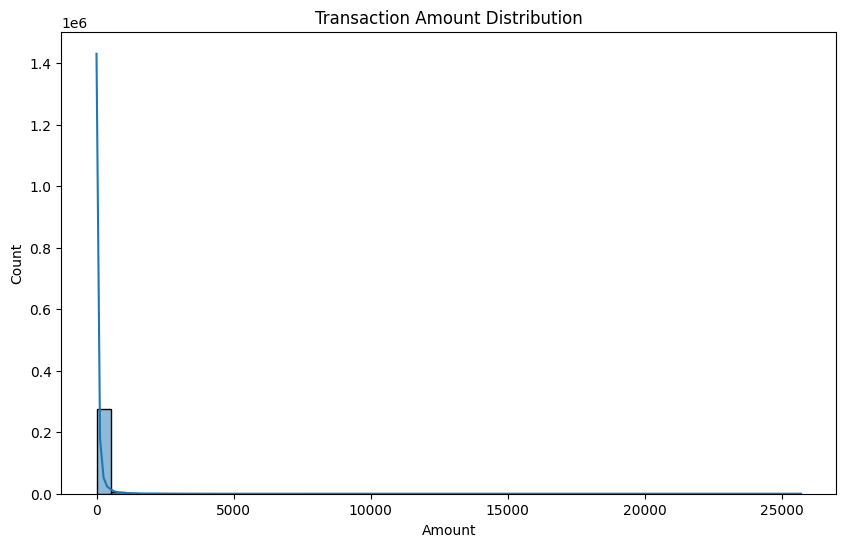

In [7]:
plt.figure(figsize=(10,6))
sns.histplot(data['Amount'],bins=50,kde=True)
plt.title("Transaction Amount Distribution")
plt.show()



/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


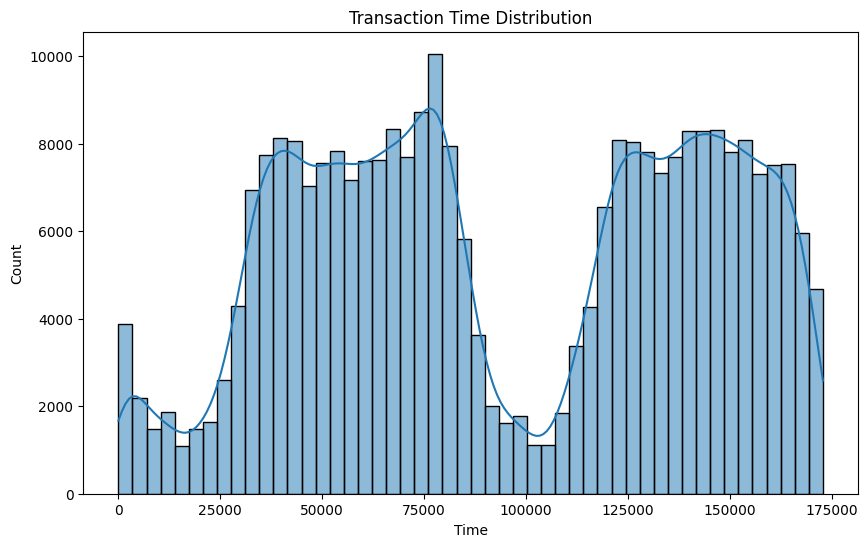

In [8]:
plt.figure(figsize=(10,6))
sns.histplot(data['Time'],bins=50,kde=True)
plt.title("Transaction Time Distribution")
plt.show()

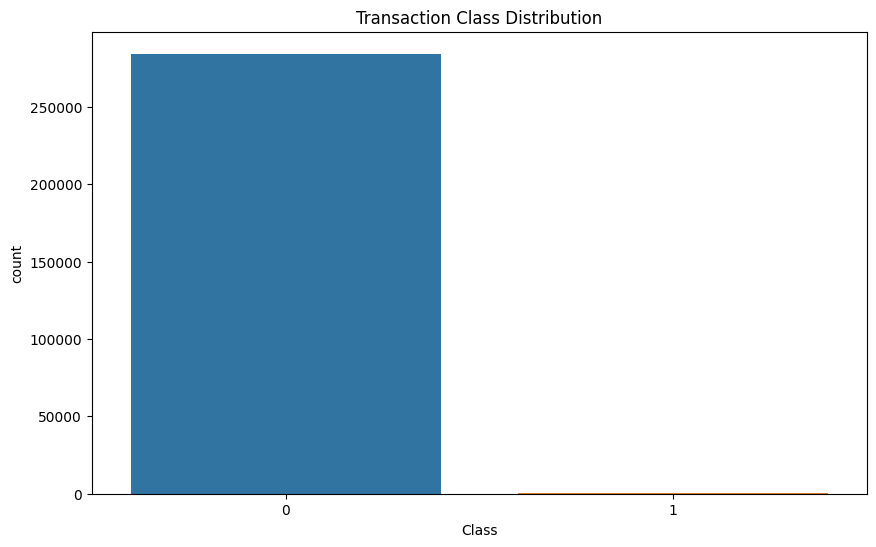

In [9]:
plt.figure(figsize=(10,6))
sns.countplot(x='Class',data=data)
plt.title("Transaction Class Distribution")
plt.show()


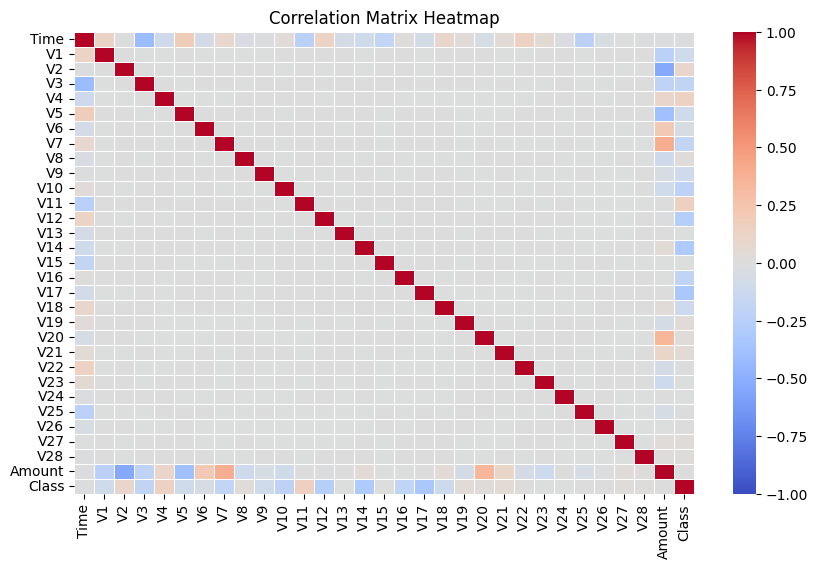

In [10]:
correlation_matrix=data.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,cmap='coolwarm',vmin=-1,vmax=1,annot=False,linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


> **Examine the imbalance between fraudulent and non-fraudulent transactions.


In [11]:
print(data['Class'].value_counts(normalize=True))


Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


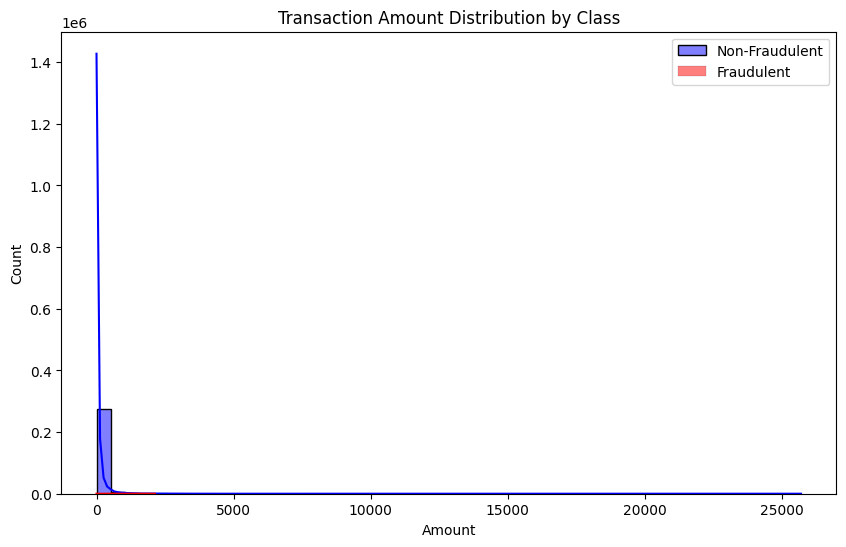

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


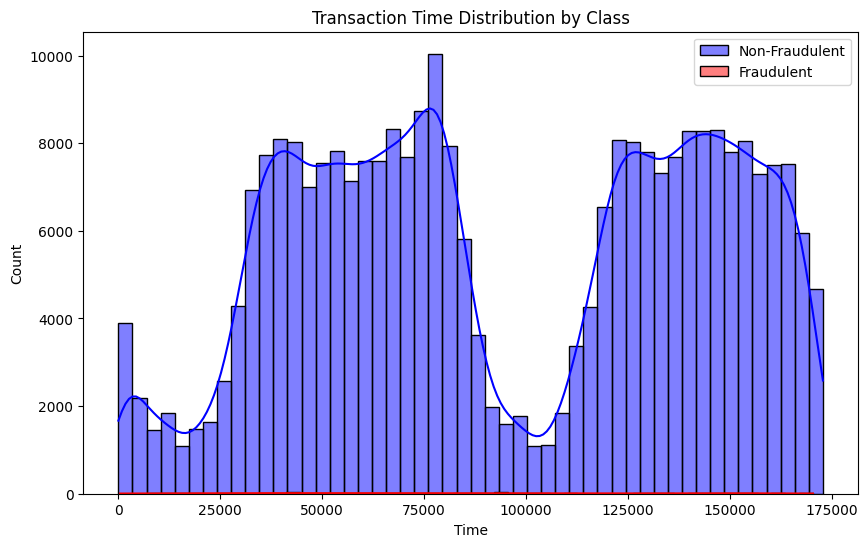

In [12]:
# Plot the amount distribution for fraudulent and non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Class'] == 0]['Amount'], bins=50, color='blue', kde=True, label='Non-Fraudulent')
sns.histplot(data[data['Class'] == 1]['Amount'], bins=50, color='red', kde=True, label='Fraudulent')
plt.title('Transaction Amount Distribution by Class')
plt.legend()
plt.show()

# Plot the time distribution for fraudulent and non-fraudulent transactions
plt.figure(figsize=(10, 6))
sns.histplot(data[data['Class'] == 0]['Time'], bins=50, color='blue', kde=True, label='Non-Fraudulent')
sns.histplot(data[data['Class'] == 1]['Time'], bins=50, color='red', kde=True, label='Fraudulent')
plt.title('Transaction Time Distribution by Class')
plt.legend()
plt.show()


In [13]:
x=data.drop("Class",axis=1)
y=data["Class"]


In [14]:
def detect_outliers_iqr(df):
    outliers_indices = []
    for column in df.columns:
        if df[column].dtype != 'object':
            Q1 = np.percentile(df[column], 25)
            Q3 = np.percentile(df[column], 75)
            IQR = Q3 - Q1
            outlier_step = 1.5 * IQR
            outliers = df[(df[column] < Q1 - outlier_step) | (df[column] > Q3 + outlier_step)].index
            outliers_indices.extend(outliers)
    return list(set(outliers_indices))

# Detect outliers
outliers_indices = detect_outliers_iqr(x)
print(f'Number of outliers detected: {len(outliers_indices)}')

Number of outliers detected: 138473


In [15]:
q1=data['Amount'].quantile(0.25)
q3=data['Amount'].quantile(0.75)
IQR=q3-q1
lower=q1-1.5*IQR
higher=q3+1.5*IQR
outliers = (data['Amount']< lower) | (data['Amount'] > higher)
print(outliers)

0         False
1         False
2          True
3         False
4         False
          ...  
284802    False
284803    False
284804    False
284805    False
284806     True
Name: Amount, Length: 284807, dtype: bool


In [16]:
higher

184.5125

In [17]:
data_cleaned = data.drop(outliers_indices).reset_index(drop=True)


In [18]:
data_cleaned

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
3,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
4,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146329,172780.0,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.144008,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,60.00,0
146330,172782.0,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.228876,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,5.49,0
146331,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.268048,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0
146332,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.314205,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0


In [19]:
x=data_cleaned["Amount"]>184.5125
print(x)

0         False
1         False
2         False
3         False
4         False
          ...  
146329    False
146330    False
146331    False
146332    False
146333    False
Name: Amount, Length: 146334, dtype: bool


/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


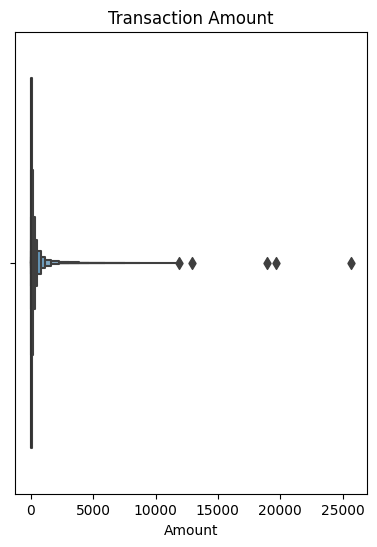

In [20]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxenplot(x=data["Amount"])
plt.title("Transaction Amount")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:1794: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


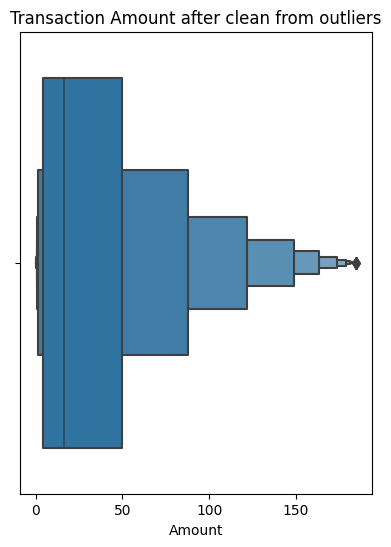

In [21]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.boxenplot(x=data_cleaned["Amount"])
plt.title("Transaction Amount after clean from outliers")
plt.show()

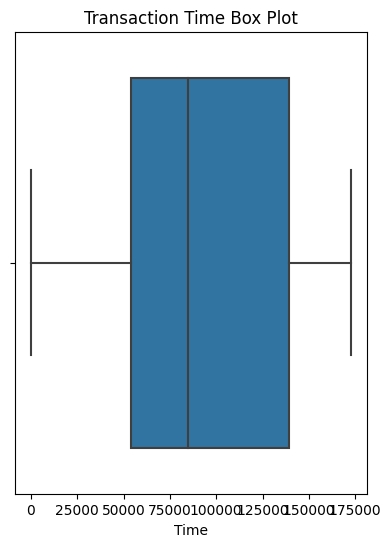

In [22]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 2)
sns.boxplot(x=data['Time'])
plt.title('Transaction Time Box Plot')
plt.show()

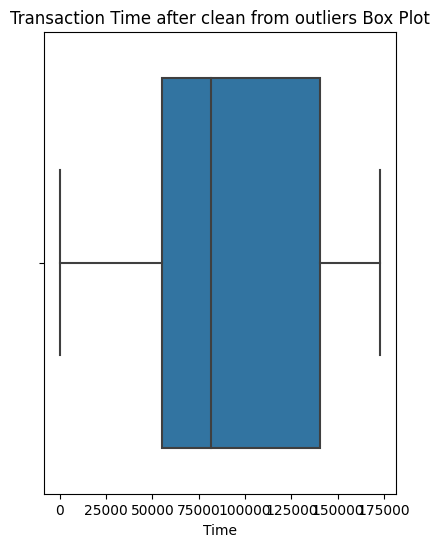

In [23]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 2)
sns.boxplot(x=data_cleaned['Time'])
plt.title('Transaction Time after clean from outliers Box Plot')
plt.show()

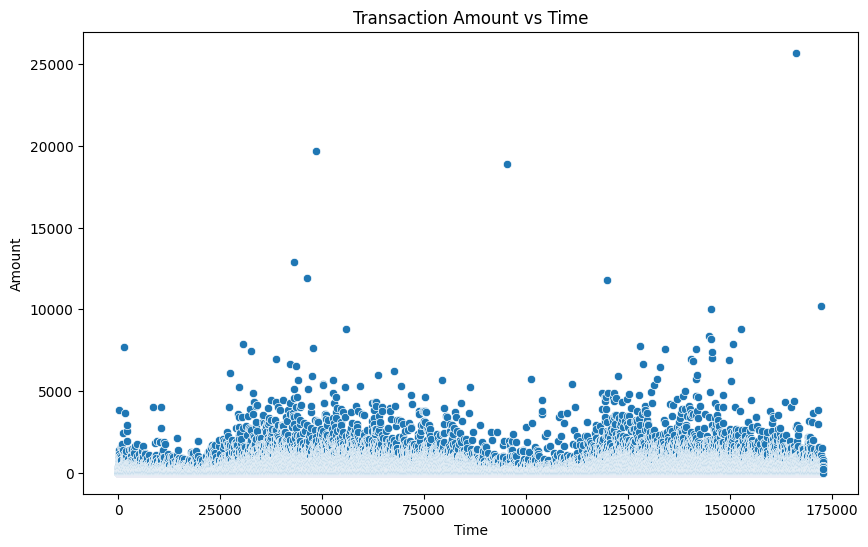

In [24]:
# Scatter plot to visualize potential outliers in Amount vs Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Time', y='Amount', data=data)
plt.title('Transaction Amount vs Time')
plt.show()


In [25]:
print(data_cleaned['Class'].value_counts())

Class
0    146319
1        15
Name: count, dtype: int64


In [26]:
x_after=data_cleaned.drop("Class",axis=1)
y_after=data_cleaned["Class"]

In [27]:
print(y_after.value_counts())

Class
0    146319
1        15
Name: count, dtype: int64


In [28]:
scaler=StandardScaler()
x_after[['Amount','Time']]=scaler.fit_transform(x_after[['Amount','Time']])

In [29]:
print(y.value_counts())

Class
0    284315
1       492
Name: count, dtype: int64


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


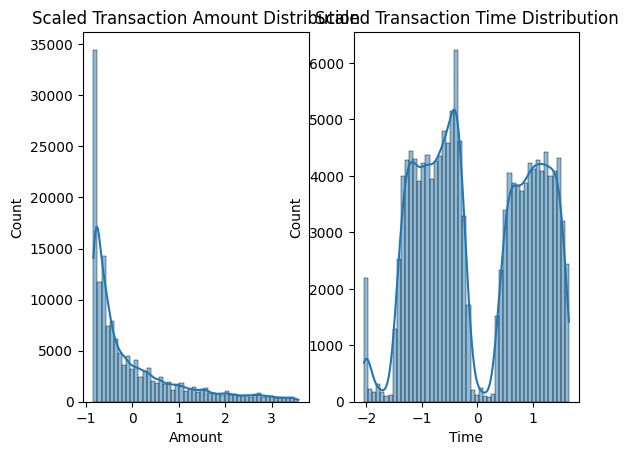

In [30]:
plt.subplot(1, 2, 1)
sns.histplot(x_after['Amount'], bins=50, kde=True)
plt.title('Scaled Transaction Amount Distribution')

# Scaled Transaction Time
plt.subplot(1, 2, 2)
sns.histplot(x_after['Time'], bins=50, kde=True)
plt.title('Scaled Transaction Time Distribution')

plt.show()

In [31]:
# Create new features for day of the week and hour of the day
x_after['DayOfWeek'] = x_after['Time'].apply(lambda x_after: (x_after // (24 * 3600)) % 7)
x_after['HourOfDay'] = x_after['Time'].apply(lambda x_after: (x_after // 3600) % 24)


In [32]:
x_after

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,DayOfWeek,HourOfDay
0,-2.043051,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,2.743119,6.0,23.0
1,-2.043051,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.770063,6.0,23.0
2,-2.043030,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,2.118575,6.0,23.0
3,-2.043009,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.839119,6.0,23.0
4,-2.043009,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,-0.746631,6.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146329,1.650307,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,0.634646,-0.042114,-0.053206,0.316403,-0.461441,0.018265,-0.041068,0.600252,0.0,0.0
146330,1.650350,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,-0.514376,0.279598,0.371441,-0.559238,0.113144,0.131507,0.081265,-0.703114,0.0,0.0
146331,1.650393,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,-0.770303,0.0,0.0
146332,1.650414,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,-0.770063,0.0,0.0


In [33]:
hourly_window = 200
daily_window = 4800
x_after["rollingmean_amount1h"]=x_after['Amount'].rolling(window=hourly_window).mean().fillna(0)
x_after["rollingstd_amount1h"]=x_after['Amount'].rolling(window=hourly_window).std().fillna(0)
x_after["rollingmean_amount1d"]=x_after["Amount"].rolling(window=daily_window).mean().fillna(0)
x_after["rollingstd_amount1d"]=x_after["Amount"].rolling(window=daily_window).std().fillna(0)


In [34]:
# Time since the last transaction
x_after['TimeSinceLastTransaction'] = x_after['Time'].diff().fillna(0)

# Amount difference from the previous transaction
x_after['AmountDiff'] = x_after['Amount'].diff().fillna(0)


In [35]:
x_after

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V28,Amount,DayOfWeek,HourOfDay,rollingmean_amount1h,rollingstd_amount1h,rollingmean_amount1d,rollingstd_amount1d,TimeSinceLastTransaction,AmountDiff
0,-2.043051,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.021053,2.743119,6.0,23.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,-2.043051,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.014724,-0.770063,6.0,23.0,0.000000,0.000000,0.000000,0.000000,0.000000,-3.513183
2,-2.043030,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.061458,2.118575,6.0,23.0,0.000000,0.000000,0.000000,0.000000,0.000021,2.888638
3,-2.043009,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.215153,0.839119,6.0,23.0,0.000000,0.000000,0.000000,0.000000,0.000021,-1.279456
4,-2.043009,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,0.081080,-0.746631,6.0,23.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.585750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146329,1.650307,1.884849,-0.143540,-0.999943,1.506772,-0.035300,-0.613638,0.190241,-0.249058,0.666458,...,-0.041068,0.600252,0.0,0.0,-0.103243,0.921127,-0.145604,0.906459,0.000064,1.413355
146330,1.650350,-0.241923,0.712247,0.399806,-0.463406,0.244531,-1.343668,0.929369,-0.206210,0.106234,...,0.081265,-0.703114,0.0,0.0,-0.103781,0.921447,-0.145583,0.906445,0.000043,-1.303366
146331,1.650393,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.075071,-0.770303,0.0,0.0,-0.114923,0.915922,-0.145814,0.906463,0.000043,-0.067189
146332,1.650414,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,0.068803,-0.770063,0.0,0.0,-0.114721,0.915772,-0.145805,0.906457,0.000021,0.000239


In [36]:
X_train, X_test,y_train,y_test=train_test_split(x_after,y_after,test_size=0.2,random_state=42)


In [37]:
models={
    "logistic_regression":LogisticRegression(class_weight='balanced'),
    "DecisionTreeClassifier":DecisionTreeClassifier(class_weight='balanced'),
    "RandomForestClassifier":RandomForestClassifier(class_weight='balanced'),
    "xgb":xgb.XGBClassifier(eval_metric='logloss',class_weight='balanced')
    
}

In [38]:
trained_models={}
for name,model in models.items():
    print(f"traning {name}")
    model.fit(X_train,y_train)
    trained_models[name]=model
    print(model.score(X_train,y_train))


traning logistic_regression


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9338754730197237
traning DecisionTreeClassifier
1.0
traning RandomForestClassifier
1.0
traning xgb


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [16:11:41] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


1.0


In [39]:
for name,model in trained_models.items():
    print(f"Evaluating {name}")
    y_pred=model.predict(X_test)
    
    #y_prob=model.predict_proba(X_test)[:,1]
    

    print(f"classification report for {name}")
    print(classification_report(y_test,y_pred))
    
    print(f"confusion  matrix  for {name}")
    print(confusion_matrix(y_test,y_pred))
    



Evaluating logistic_regression
classification report for logistic_regression
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     29264
           1       0.00      0.00      0.00         3

    accuracy                           0.93     29267
   macro avg       0.50      0.47      0.48     29267
weighted avg       1.00      0.93      0.96     29267

confusion  matrix  for logistic_regression
[[27217  2047]
 [    3     0]]
Evaluating DecisionTreeClassifier
classification report for DecisionTreeClassifier
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29264
           1       0.00      0.00      0.00         3

    accuracy                           1.00     29267
   macro avg       0.50      0.50      0.50     29267
weighted avg       1.00      1.00      1.00     29267

confusion  matrix  for DecisionTreeClassifier
[[29259     5]
 [    3     0]]
Evaluating RandomForestClassifier
c

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classif